In [10]:
import reload_data

In [12]:
import importlib

importlib.reload(reload_data)

<module 'reload_data' from '/content/reload_data.py'>

In [13]:
help(reload_data)

Help on module reload_data:

NAME
    reload_data

FUNCTIONS
    apply_augmentations()
        Apply `data_augmentation` to the training images.
    
    data_augmentation(images)
        Function for testing augmentations with test_augmentations(), not meant for use
        
        For applying augmentations, use: apply_augmentations()
    
    del_old_writer_directories(source_dir)
        Deletes original writer-organized directories (for use after creating train/val directories with stratify_split())
    
    full_unzip_and_stratify(path_of_zipfile, source_dir, IMAGE_SIZE=(384, 384), BATCH_SIZE=18)
        Starts with zipped file, divides unzipped images by author, splits sorted images into train/val images,
        creates & returns train/val datatsets
    
    organize_unzipped_files(source_dir)
        Organizes raw unzipped files into writer folders
    
    stratify_split(source_dir)
        Re-organizes images in writer folders into train/val folders with writer sub-director

In [14]:
help(reload_data.full_unzip_and_stratify)

Help on function full_unzip_and_stratify in module reload_data:

full_unzip_and_stratify(path_of_zipfile, source_dir, IMAGE_SIZE=(384, 384), BATCH_SIZE=18)
    Starts with zipped file, divides unzipped images by author, splits sorted images into train/val images,
    creates & returns train/val datatsets



In [15]:
source_dir = "/content/Data"

In [16]:
train_ds,val_ds = reload_data.full_unzip_and_stratify("/content/CSAFE_Handwriting_Images.zip",source_dir)

Found 1980 files belonging to 90 classes.
Found 450 files belonging to 90 classes.


In [18]:
from tensorflow.keras.models import load_model

### BaseModel

In [20]:
BaseModel = load_model("/content/BaseModel_colab.keras")
AugmentedModel = load_model("/content/Augmented_BaseModel_colab.keras")

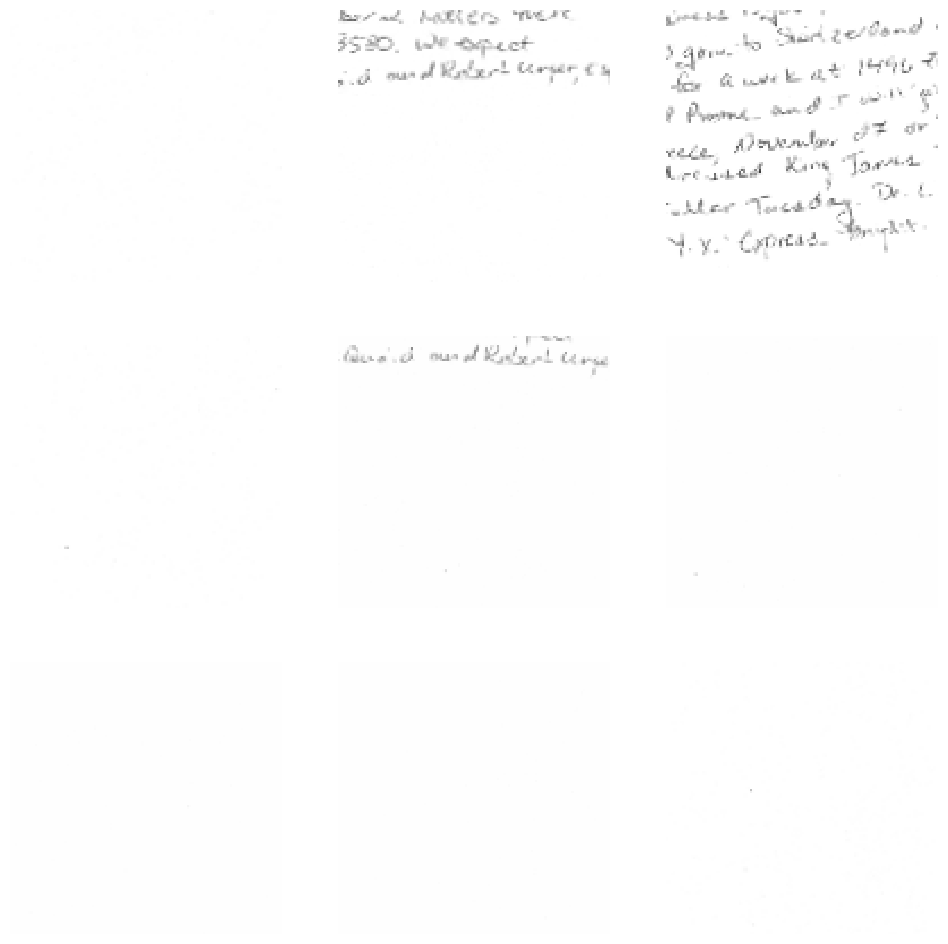

In [26]:
reload_data.test_augmentation(val_ds)

    Again, concerns about whitespace

In [27]:
epochs = 15

In [30]:
import tensorflow as tf
import keras

In [35]:
#callbacks = [keras.callbacks.ModelCheckpoint("Base_Val_epoch{epoch}.keras"),]

history = BaseModel.predict(val_ds,)

25/25 ━━━━━━━━━━━━━━━━━━━━ 272s 11s/step


In [44]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt

In [36]:
history

array([[146.88148 , 155.10974 ,  68.62651 , ..., 151.67476 , 219.74918 ,
        151.8376  ],
       [120.77088 , 146.47012 , 123.252754, ..., 183.80705 , 147.51175 ,
        177.10345 ],
       [120.908226, 166.17418 , 117.26487 , ..., 176.32237 , 159.32147 ,
        186.99155 ],
       ...,
       [146.32101 , 173.3098  ,  95.47021 , ..., 167.44023 , 189.64258 ,
        174.15791 ],
       [129.61823 , 186.7124  ,  98.89424 , ..., 167.80318 , 187.88153 ,
        174.37279 ],
       [105.68413 , 153.41629 , 123.18479 , ..., 173.98813 , 151.57874 ,
        182.83391 ]], dtype=float32)

In [37]:
import numpy as np

In [39]:
from sklearn.preprocessing import label_binarize

In [55]:
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = BaseModel.predict(images)  # shape: (batch_size, num_classes)
    y_pred.append(preds)
    y_true.append(labels.numpy())

# Convert lists to arrays
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Binarize the true labels (needed for multiclass ROC)
n_classes = y_pred.shape[1]
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


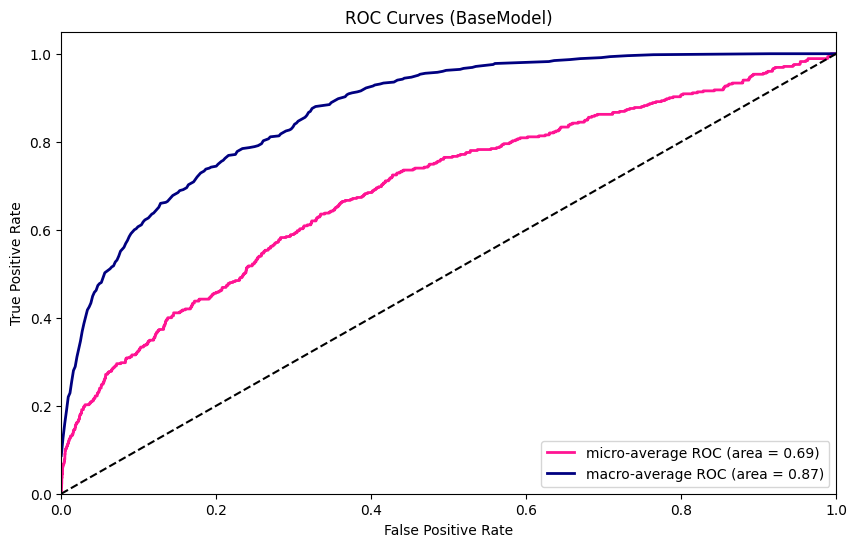

In [59]:
fpr = dict()
tpr = dict()
roc_auc = dict()

y_true_bin = np.array(y_true_bin)
y_pred = np.array(y_pred)


for i in range(90):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#from sklearn.metrics import roc_auc_score
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])




####Macro Average
# First aggregate all FPRs
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(90)]))

# Then interpolate all ROC curves at these points and average the TPR
mean_tpr = np.zeros_like(all_fpr)
for i in range(90):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 90  # Average it

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])






# Plot example: micro-average + 2 sample classes
plt.figure(figsize=(10, 6))
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linewidth=2)

# Plot ROC for first 2 classes
#colors = ['aqua', 'darkorange',#"red","blue","green"
#                ]
#for i, color in zip(range(2), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=2,
#             label='ROC curve of class {0} (area = {1:0.2f})'
#             ''.format(i, roc_auc[i]))




plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle='-', linewidth=2)




plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (BaseModel)')
plt.legend(loc="lower right")

plt.show()

### Augmented Model

In [60]:
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = AugmentedModel.predict(images)  # shape: (batch_size, num_classes)
    y_pred.append(preds)
    y_true.append(labels.numpy())

# Convert lists to arrays
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Binarize the true labels (needed for multiclass ROC)
n_classes = y_pred.shape[1]
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


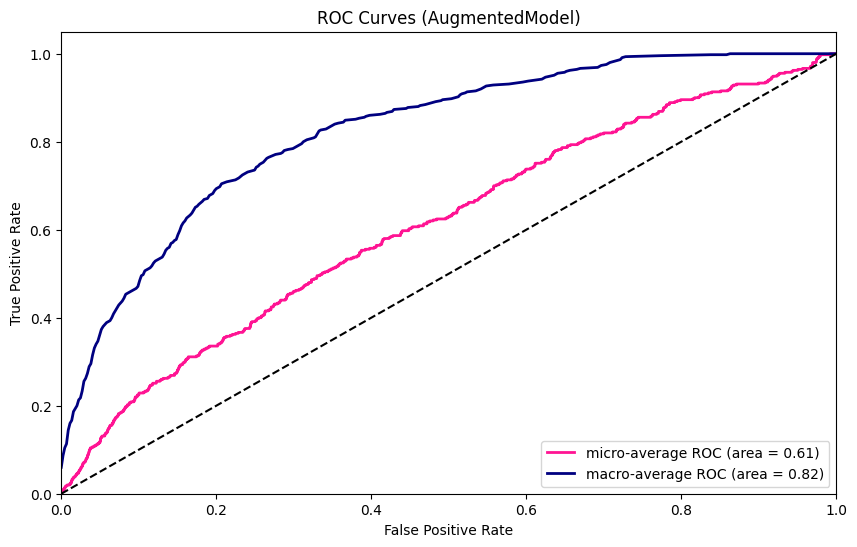

In [61]:
fpr = dict()
tpr = dict()
roc_auc = dict()

y_true_bin = np.array(y_true_bin)
y_pred = np.array(y_pred)


for i in range(90):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#from sklearn.metrics import roc_auc_score
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])




####Macro Average
# First aggregate all FPRs
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(90)]))

# Then interpolate all ROC curves at these points and average the TPR
mean_tpr = np.zeros_like(all_fpr)
for i in range(90):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 90  # Average it

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])





# Plot example: micro-average
plt.figure(figsize=(10, 6))
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linewidth=2)


plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle='-', linewidth=2)


plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (AugmentedModel)')
plt.legend(loc="lower right")

plt.show()

    Base Model performed better.
    Values could be inflated by using validation dataset as test data